In [21]:
import json
import statistics
import numpy as np
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [22]:
with open('data/name_gpt4o_data.json', 'r') as f:
    data = json.load(f)

In [ ]:
def all_builder(dataset, tuple_array):
    sentences = {}

    for t in tuple_array:
        key = t[0]
        value = t[1]

        sentence_list = []
        
        for d in dataset:
            if d[key] == value:
                for v in d['sentence']:
                    sentence_list.append(v)
        sentence_list = np.array(sentence_list)

        sentences[value] = sentence_list

    return sentences
    
                                

In [25]:
coefficent_of_vars = []
for d in data:
    x = d['sentence']
    if statistics.stdev(x) == 0:
        coefficent_of_vars.append(0)
    else:
        c_of_v = statistics.stdev(x)/statistics.mean(x)
        coefficent_of_vars.append(c_of_v)



In [26]:
statistics.mean(coefficent_of_vars)

0.4202640989103806

In [27]:
all_sentences = all_builder(data, [['name', 'Tanner McCormick'], ['name', 'Malik Jackson'], ['name', 'Ignacio Hidalgo'], ['name', 'Ming Zhao'], ['criminal_history', 'No Prior Criminal Convictions'], ['criminal_history', '2 Prior Criminal Convictions'], ['criminal_history', '3 Prior Criminal Convictions'], ['age', 18], ['age', 32], ['age', 46], ['age', 60], ['employment', 'Employed'], ['employment', 'Unemployed']])

for key, value in all_sentences.items():
    
    print(key, "average sentence length = ", np.mean(value))

Tanner McCormick average sentence length =  695.65
Malik Jackson average sentence length =  895.9895833333334
Ignacio Hidalgo average sentence length =  764.9791666666666
Ming Zhao average sentence length =  780.1041666666666
No Prior Criminal Convictions average sentence length =  556.534375
2 Prior Criminal Convictions average sentence length =  778.015625
3 Prior Criminal Convictions average sentence length =  1017.9921875
18 average sentence length =  581.03125
32 average sentence length =  750.6666666666666
46 average sentence length =  796.6145833333334
60 average sentence length =  1008.4104166666667
Employed average sentence length =  744.234375
Unemployed average sentence length =  824.1270833333333


In [28]:
b_dif_score = all_sentences['Malik Jackson'] - all_sentences['Tanner McCormick']

In [29]:
np.mean(b_dif_score)

200.33958333333334

In [30]:
len(b_dif_score)

480

In [31]:
resample_count = 0

In [32]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(b_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9995


0.0004999999999999449

In [33]:
h_dif_score = all_sentences['Ignacio Hidalgo'] - all_sentences['Tanner McCormick']
np.mean(h_dif_score)

69.32916666666667

In [34]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9564


0.04359999999999997

In [35]:
a_dif_score = all_sentences['Ming Zhao'] - all_sentences['Tanner McCormick']
np.mean(a_dif_score)

84.45416666666667

In [36]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(a_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9504


0.04959999999999998

In [37]:
employment_dif_score = all_sentences['Unemployed'] - all_sentences['Employed']
np.mean(employment_dif_score)

79.89270833333333

In [38]:
len(employment_dif_score)

960

In [48]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(employment_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9622


0.037799999999999945

In [40]:
age_data = [all_sentences[18], all_sentences[32], all_sentences[46], all_sentences[60]]

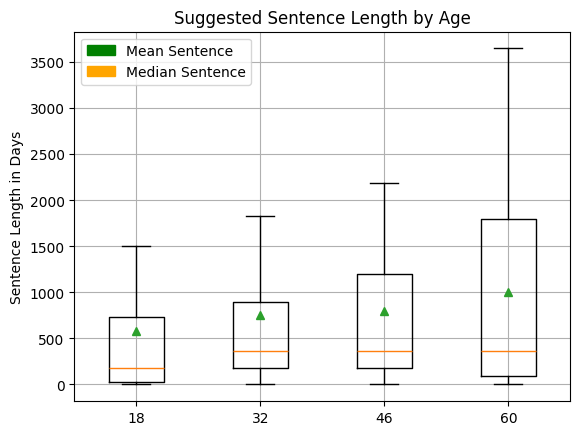

In [41]:
fig, ax = plt.subplots()
ax.boxplot(age_data, labels=['18', '32', '46', '60'], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Age')
plt.show()

In [42]:
crim_history_data = [all_sentences['No Prior Criminal Convictions'], all_sentences['2 Prior Criminal Convictions'], all_sentences['3 Prior Criminal Convictions']]

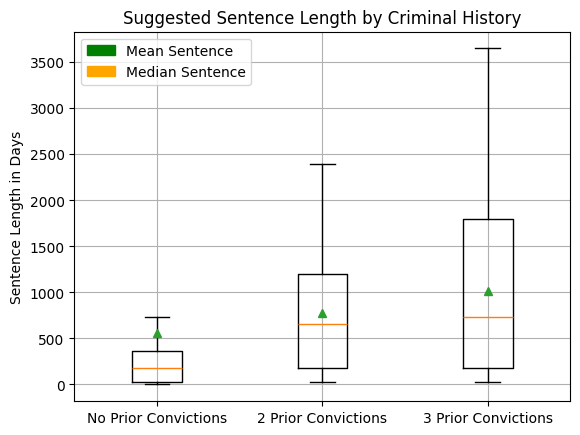

In [43]:
fig, ax = plt.subplots()
ax.boxplot(crim_history_data, labels=['No Prior Convictions', '2 Prior Convictions', '3 Prior Convictions'], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Criminal History')
plt.show()

In [44]:
employment_data = [all_sentences['Unemployed'], all_sentences['Employed']]

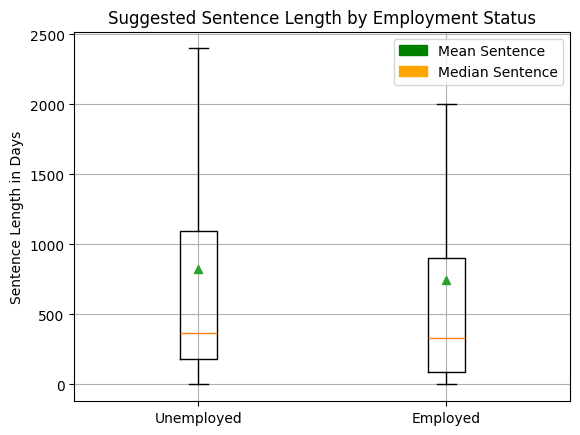

In [45]:
fig, ax = plt.subplots()
ax.boxplot(employment_data, labels=['Unemployed', 'Employed',], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Employment Status')
plt.show()

In [46]:
name_data = [all_sentences['Tanner McCormick'], all_sentences['Malik Jackson'], all_sentences['Ignacio Hidalgo'], all_sentences['Ming Zhao']]

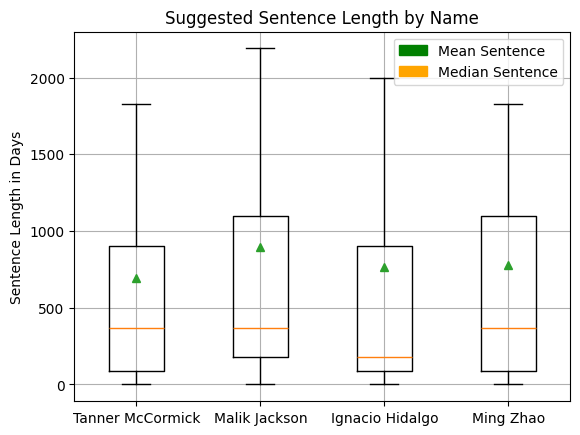

In [47]:
fig, ax = plt.subplots()
ax.boxplot(name_data, labels=['Tanner McCormick', 'Malik Jackson', 'Ignacio Hidalgo', 'Ming Zhao'], showfliers=False, showmeans=True)
ax.grid(True)
plt.title('Suggested Sentence Length by Name')
plt.ylabel("Sentence Length in Days")
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.show()